In [70]:
import pandas as pd
import torch
import random

In [26]:
pacientes_df = pd.read_excel("pacientes_small.xlsx", sheet_name="s1")
pacientes_df.head(101)

,ID,COORDENADAS,REQUERIMIENTO,MEDICAMENTO,EXAMEN,DURACIÓN,INICIO VENTANA,FIN VENTANA,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SÁBADO,DOMINGO
0,1,"(-33.407984475555196, -70.57434246230358)",Baja Complejidad,No,Examen No Perecible,30,08:00:00,17:00:00,No,No,Si,Si,Si,No,No
1,2,"(-33.40673304855977, -70.65932146158067)",Baja Complejidad,No,Examen No Perecible,30,08:00:00,17:00:00,No,No,Si,Si,Si,Si,No
2,3,"(-33.53481983349353, -70.57330348394986)",Baja Complejidad,No,Examen No Perecible,30,08:00:00,17:00:00,No,No,Si,Si,Si,Si,No
3,4,"(-33.44325655353938, -70.64482923346527)",Baja Complejidad,No,No,30,08:00:00,17:00:00,No,Si,Si,Si,Si,Si,Si
4,5,"(-33.41223812690537, -70.5871952875033)",Baja Complejidad,No,No,30,08:00:00,17:00:00,No,Si,Si,Si,Si,Si,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,"(-33.67272517624554, -70.67003235969194)",Mediana Complejidad,Medicamento Perecible,No,150,09:30,13:30,No,No,No,No,No,No,No
96,97,"(-33.55121925020488, -70.54759780670457)",Ambulatorio Baja Complejidad,Medicamento Perecible,No,60,09:00,22:00,No,No,Si,No,Si,Si,No
97,98,"(-33.461409858089326, -70.50350229644668)",Evaluación o Seguimiento,No,No,60,08:00,23:00,No,Si,No,Si,No,Si,No
98,99,"(-33.45575531575613, -70.53003143993831)",Alta Complejidad,No,Examen Perecible,30,08:00,23:00,No,No,No,No,Si,No,No


In [27]:

coords_split = pacientes_df["COORDENADAS"].str.strip("()").str.split(",", expand=True)
pacientes_df["lat"] = coords_split[0].astype(float)
pacientes_df["lon"] = coords_split[1].astype(float)
print(pacientes_df["lat"])


0    -33.407984
1    -33.406733
2    -33.534820
3    -33.443257
4    -33.412238
        ...    
95   -33.672725
96   -33.551219
97   -33.461410
98   -33.455755
99   -33.540388
Name: lat, Length: 100, dtype: float64


In [28]:
mininmo_lat = pacientes_df["lat"].min()
maximo_lat = pacientes_df["lat"].max()
mininmo_lon = pacientes_df["lon"].min()
maximo_lon = pacientes_df["lon"].max()
factor = max(maximo_lat - mininmo_lat, maximo_lon - mininmo_lon)
pacientes_df["lat_normalizado"] = (pacientes_df["lat"] - mininmo_lat) / factor
pacientes_df["lon_normalizado"] = (pacientes_df["lon"] - mininmo_lon) / factor
print(pacientes_df["lat_normalizado"])

0     0.710476
1     0.713835
2     0.370092
3     0.615818
4     0.699061
        ...   
95    0.000000
96    0.326082
97    0.567100
98    0.582275
99    0.355149
Name: lat_normalizado, Length: 100, dtype: float64


In [29]:
# Crear una lista de tuplas donde cada tupla es (lat_normalizado, lon_normalizado)
coordenadas_tuplas = list(zip(pacientes_df["lat_normalizado"], pacientes_df["lon_normalizado"]))
print(coordenadas_tuplas)
print(len(coordenadas_tuplas))


[(0.7104761131667424, 0.5509657794123016), (0.7138345275899957, 0.3229103691570793), (0.3700921378839222, 0.553754052241111), (0.6158175706601746, 0.36180269616122596), (0.6990607256945522, 0.5164730653441456), (0.6108194121546803, 0.36690945751158865), (0.6036899170693631, 0.3367378895632954), (0.6036899170693631, 0.3367378895632954), (0.5892050679928279, 0.3206213148683029), (0.5892050679928279, 0.3206213148683029), (0.5088496572136626, 0.6580578964430972), (0.5088496572136626, 0.6580578964430972), (0.4737132694510142, 0.19289436009171987), (0.4737132694510142, 0.19289436009171987), (0.7472005179983979, 0.5829279639953056), (0.7472005179983979, 0.5829279639953056), (0.5119598875634629, 0.4869856504753883), (0.634123808690781, 0.5380190378830296), (0.18286668804517225, 0.5115198074567937), (0.18286668804517225, 0.5115198074567937), (0.4314047775175265, 0.010415262607607176), (0.6204503094176027, 0.046492195249227694), (0.6204503094176027, 0.046492195249227694), (0.7798665935726259, 0.

In [30]:
pacientes_df_2 = pd.read_excel("pacientes_small.xlsx", sheet_name="s2")


In [31]:
pacientes_df_2["lat"] = coords_split[0].astype(float)
pacientes_df_2["lon"] = coords_split[1].astype(float)
mininmo_lat = pacientes_df_2["lat"].min()
maximo_lat = pacientes_df_2["lat"].max()
mininmo_lon = pacientes_df_2["lon"].min()
maximo_lon = pacientes_df_2["lon"].max()
factor = max(maximo_lat - mininmo_lat, maximo_lon - mininmo_lon)
pacientes_df_2["lat_normalizado"] = (pacientes_df_2["lat"] - mininmo_lat) / factor
pacientes_df_2["lon_normalizado"] = (pacientes_df_2["lon"] - mininmo_lon) / factor
print(pacientes_df_2["lat_normalizado"])

0     0.710476
1     0.713835
2     0.370092
3     0.615818
4     0.699061
        ...   
95    0.000000
96    0.326082
97    0.567100
98    0.582275
99    0.355149
Name: lat_normalizado, Length: 100, dtype: float64


In [32]:
coordenadas_tuplas_2 = list(zip(pacientes_df["lat_normalizado"], pacientes_df["lon_normalizado"]))
coordenadas_tuplas += coordenadas_tuplas_2
len(coordenadas_tuplas) 

200

## Creación datasets

In [33]:
pacientes_df = pd.read_excel("pacientes_small.xlsx", sheet_name=f"s6")

In [34]:
pacientes_df["lat"] = coords_split[0].astype(float)
pacientes_df["lon"] = coords_split[1].astype(float)
mininmo_lat = pacientes_df["lat"].min()
maximo_lat = pacientes_df["lat"].max()
mininmo_lon = pacientes_df["lon"].min()
maximo_lon = pacientes_df["lon"].max()
factor = max(maximo_lat - mininmo_lat, maximo_lon - mininmo_lon)
pacientes_df["lat_normalizado"] = (pacientes_df["lat"] - mininmo_lat) / factor
pacientes_df["lon_normalizado"] = (pacientes_df["lon"] - mininmo_lon) / factor

In [35]:
dic = {}
for index, row in pacientes_df.iterrows():
    dic[index + 1] = (row["lat_normalizado"], row["lon_normalizado"])
print(dic)

{1: (0.7104761131667424, 0.5509657794123016), 2: (0.7138345275899957, 0.3229103691570793), 3: (0.3700921378839222, 0.553754052241111), 4: (0.6158175706601746, 0.36180269616122596), 5: (0.6990607256945522, 0.5164730653441456), 6: (0.6108194121546803, 0.36690945751158865), 7: (0.6036899170693631, 0.3367378895632954), 8: (0.6036899170693631, 0.3367378895632954), 9: (0.5892050679928279, 0.3206213148683029), 10: (0.5892050679928279, 0.3206213148683029), 11: (0.5088496572136626, 0.6580578964430972), 12: (0.5088496572136626, 0.6580578964430972), 13: (0.4737132694510142, 0.19289436009171987), 14: (0.4737132694510142, 0.19289436009171987), 15: (0.7472005179983979, 0.5829279639953056), 16: (0.7472005179983979, 0.5829279639953056), 17: (0.5119598875634629, 0.4869856504753883), 18: (0.634123808690781, 0.5380190378830296), 19: (0.18286668804517225, 0.5115198074567937), 20: (0.18286668804517225, 0.5115198074567937), 21: (0.4314047775175265, 0.010415262607607176), 22: (0.6204503094176027, 0.046492195

In [36]:
import csv

with open('datasets/dic_nodos.csv', mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['NODE', 'X', 'Y'])
    for node, (x, y) in dic.items():
        writer.writerow([node, x, y])


### Crear instancias Prueba (semanas 7 - 12)

In [37]:
import os
import csv

In [38]:
from traceback import print_tb


for i in range(7,13):
    pacientes_df = pd.read_excel("pacientes_small.xlsx", sheet_name=f"s{i}")
    # Separar coordenadas
    coords_split = pacientes_df["COORDENADAS"].str.strip("()").str.split(",", expand=True)
    pacientes_df["lat"] = coords_split[0].astype(float)
    pacientes_df["lon"] = coords_split[1].astype(float)
    # Normalizar coords
    mininmo_lat = pacientes_df["lat"].min()
    maximo_lat = pacientes_df["lat"].max()
    mininmo_lon = pacientes_df["lon"].min()
    maximo_lon = pacientes_df["lon"].max()
    factor = max(maximo_lat - mininmo_lat, maximo_lon - mininmo_lon)
    pacientes_df["lat_normalizado"] = (pacientes_df["lat"] - mininmo_lat) / factor
    pacientes_df["lon_normalizado"] = (pacientes_df["lon"] - mininmo_lon) / factor

    # Crear diccionario de coordenadas
    dic = {}
    for index, row in pacientes_df.iterrows():
        dic[index + 1] = (row["lat_normalizado"], row["lon_normalizado"])

        # Por cada día de la semana, crear diccionario de nodos a visitar en ese día
        dias_semana = ["LUNES", "MARTES", "MIERCOLES", "JUEVES", "VIERNES", "SÁBADO", "DOMINGO"]
        nodos_por_dia = {}

    for dia in dias_semana:
        # Nos aseguramos que el nombre de la columna exista (por si falta en algunas sheets)
        if dia in pacientes_df.columns:
            # index+1 para mantener la numeración de nodos
            nodos = [index + 1 for index, row in pacientes_df.iterrows() if str(row[dia]).strip().upper() == "SI"]
            # Guardar el diccionario de las coords (normalizadas) de los pacientes de ese día
            coords_dic = {node: dic[node] for node in nodos}
            nodos_por_dia[dia] = coords_dic
        # Ahora nodos_por_dia[DIA] te da el diccionario de nodos/coordenadas a visitar ese día

    # Guardar archivos para cada día en la carpeta dataset
    output_dir = "datasets"
    os.makedirs(output_dir, exist_ok=True)

    for dia, coords_dic in nodos_por_dia.items():
        # Construimos el nombre del archivo como se indicó: grafo_s{i}_dia, todo minúscula
        filename = f"grafo_s{i}_{dia.lower()}"
        filepath = os.path.join(output_dir, filename)
        # Escribimos el csv
        with open(filepath, mode='w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['NODE', 'X', 'Y'])
            for node, (x, y) in coords_dic.items():
                writer.writerow([node, x, y])
    

### Crear instancias Entrenamiento (semanas 1 - 11)

In [69]:
for i in range(1,12):
    pacientes_df = pd.read_excel("pacientes_small.xlsx", sheet_name=f"s{i}")
    # Separar coordenadas
    coords_split = pacientes_df["COORDENADAS"].str.strip("()").str.split(",", expand=True)
    pacientes_df["lat"] = coords_split[0].astype(float)
    pacientes_df["lon"] = coords_split[1].astype(float)
    # Normalizar coords
    mininmo_lat = pacientes_df["lat"].min()
    maximo_lat = pacientes_df["lat"].max()
    mininmo_lon = pacientes_df["lon"].min()
    maximo_lon = pacientes_df["lon"].max()
    factor = max(maximo_lat - mininmo_lat, maximo_lon - mininmo_lon)
    pacientes_df["lat_normalizado"] = (pacientes_df["lat"] - mininmo_lat) / factor
    pacientes_df["lon_normalizado"] = (pacientes_df["lon"] - mininmo_lon) / factor

    # Crear diccionario de coordenadas
    dic = {}
    for index, row in pacientes_df.iterrows():
        dic[index + 1] = (row["lat_normalizado"], row["lon_normalizado"])

        # Por cada día de la semana, crear diccionario de nodos a visitar en ese día
        dias_semana = ["LUNES", "MARTES", "MIERCOLES", "JUEVES", "VIERNES", "SÁBADO", "DOMINGO"]
        nodos_por_dia = {}
    # Limitar a un máximo de 42 nodos por instancia por día
    
    for dia in dias_semana:
        if dia in pacientes_df.columns:
            nodos = [index + 1 for index, row in pacientes_df.iterrows() if str(row[dia]).strip().upper() == "SI"]
            # Si hay más de 42 nodos, eliminar aleatoriamente los necesarios
            if len(nodos) > 42:
                nodos = random.sample(nodos, 42)
            coords_dic = {node: dic[node] for node in nodos}
            nodos_por_dia[dia] = coords_dic

    # for dia in dias_semana:
    #     # Nos aseguramos que el nombre de la columna exista (por si falta en algunas sheets)
    #     if dia in pacientes_df.columns:
    #         # index+1 para mantener la numeración de nodos
    #         nodos = [index + 1 for index, row in pacientes_df.iterrows() if str(row[dia]).strip().upper() == "SI"]
    #         # Guardar el diccionario de las coords (normalizadas) de los pacientes de ese día
    #         coords_dic = {node: dic[node] for node in nodos}
    #         nodos_por_dia[dia] = coords_dic
    #     # Ahora nodos_por_dia[DIA] te da el diccionario de nodos/coordenadas a visitar ese día

    # Guardar archivos para cada día en la carpeta dataset
    output_dir = "training_datasets"
    os.makedirs(output_dir, exist_ok=True)

    for dia, coords_dic in nodos_por_dia.items():
        # Construimos el nombre del archivo como se indicó: grafo_s{i}_dia, todo minúscula
        filename = f"grafo_s{i}_{dia.lower()}"
        filepath = os.path.join(output_dir, filename)
        # Escribimos el csv
        with open(filepath, mode='w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['NODE', 'X', 'Y'])
            for node, (x, y) in coords_dic.items():
                writer.writerow([node, x, y])
    

In [40]:
# Calcular el número de nodos por día y por semana usando nodos_por_dia

# Cantidad de nodos por día
nodos_por_dia_count = {dia: len(nodos) for dia, nodos in nodos_por_dia.items()}

# Cantidad total de nodos de la semana (unión de todos los nodos visitados durante la semana)
todos_los_nodos = set()
for nodos in nodos_por_dia.values():
    todos_los_nodos.update(nodos.keys())
total_nodos_semana = len(todos_los_nodos)

# Mostrar resultados
print("Cantidad de nodos por día:")
for dia, count in nodos_por_dia_count.items():
    print(f"{dia}: {count}")

print(f"Cantidad total de nodos visitados en la semana: {total_nodos_semana}")


Cantidad de nodos por día:
LUNES: 49
MARTES: 60
MIERCOLES: 50
JUEVES: 48
VIERNES: 50
SÁBADO: 40
DOMINGO: 48
Cantidad total de nodos visitados en la semana: 100


## Gráfico Instancias Aleatorias

In [92]:
df_neural_sa_aleatorio_m1 = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp1.0_m1_i1.csv")
df_neural_sa_aleatorio_m2 = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp1.0_m2_i1.csv")
df_neural_sa_aleatorio_m5 = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp1.0_m5_i1.csv")
df_neural_sa_aleatorio_m10 = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp1.0_m10_i1.csv")

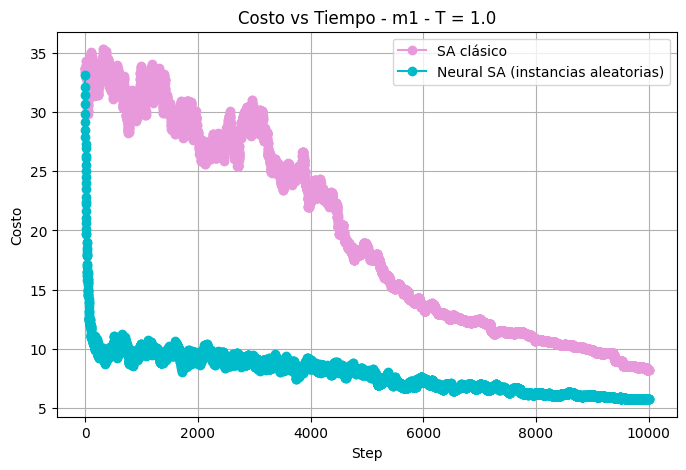

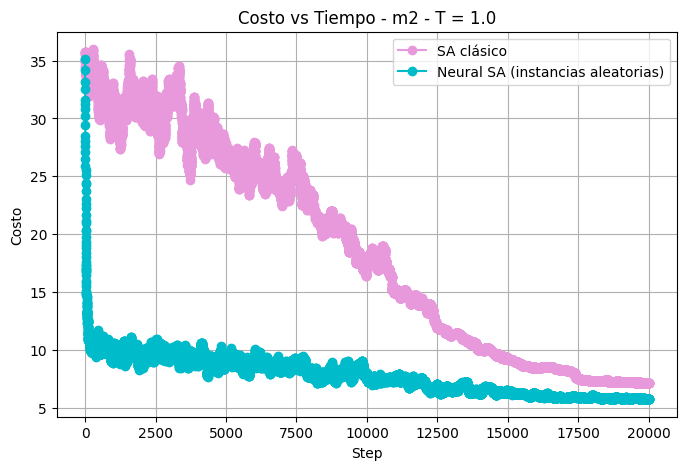

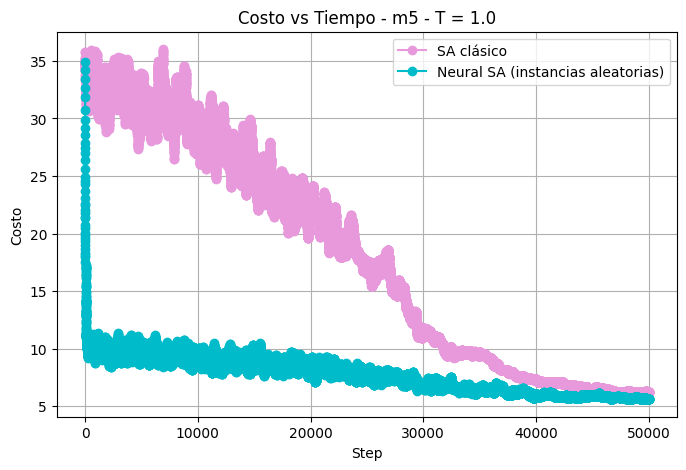

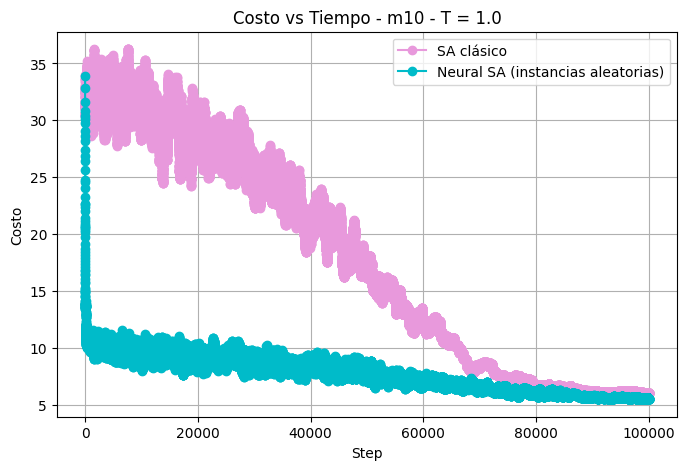

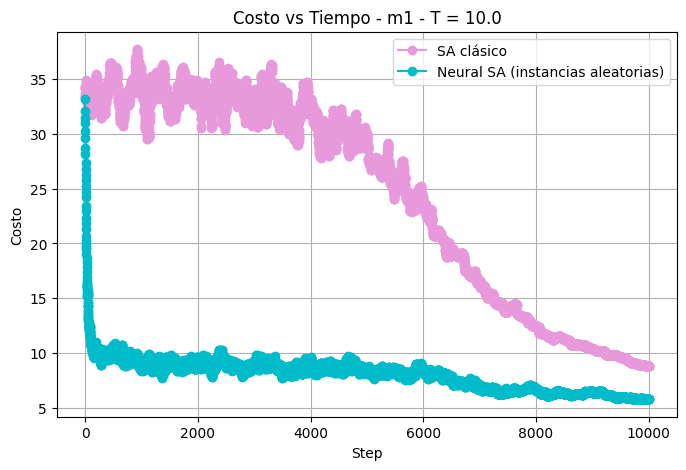

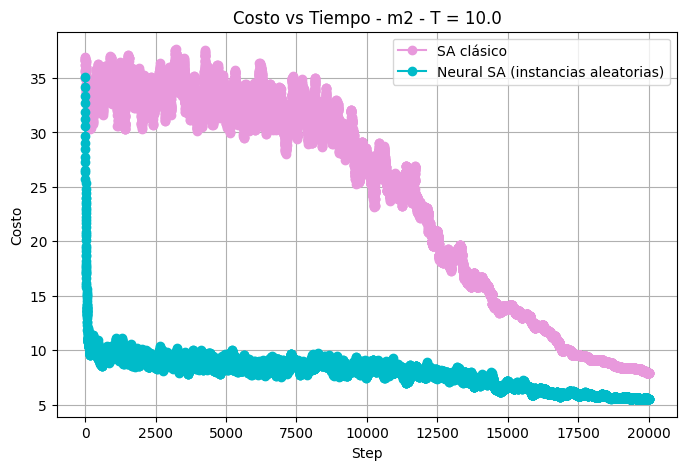

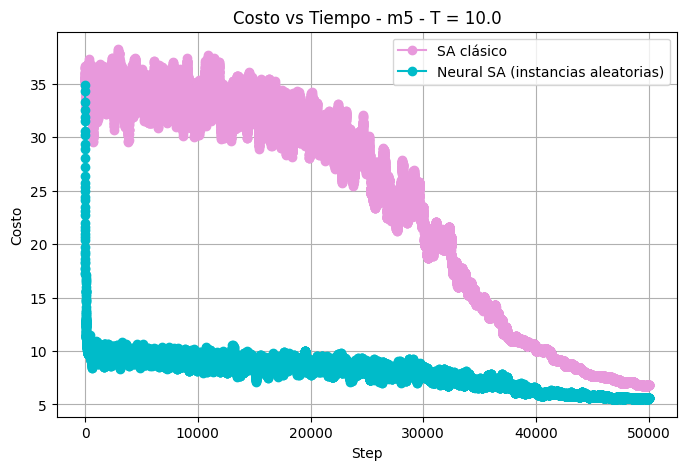

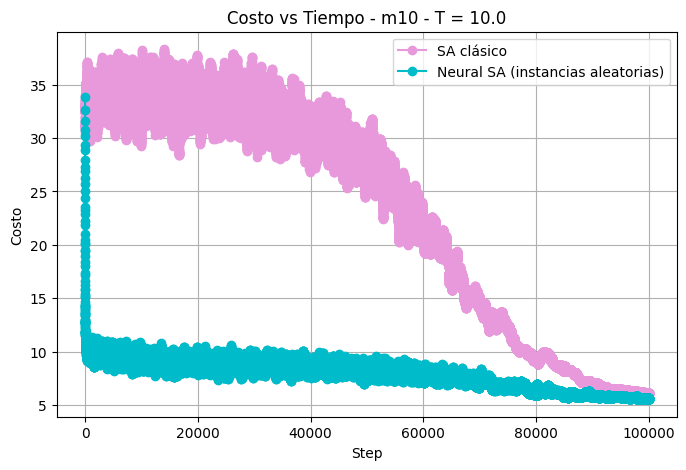

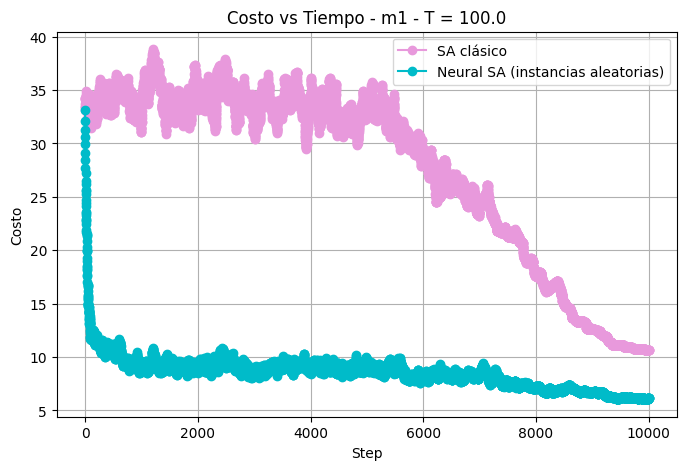

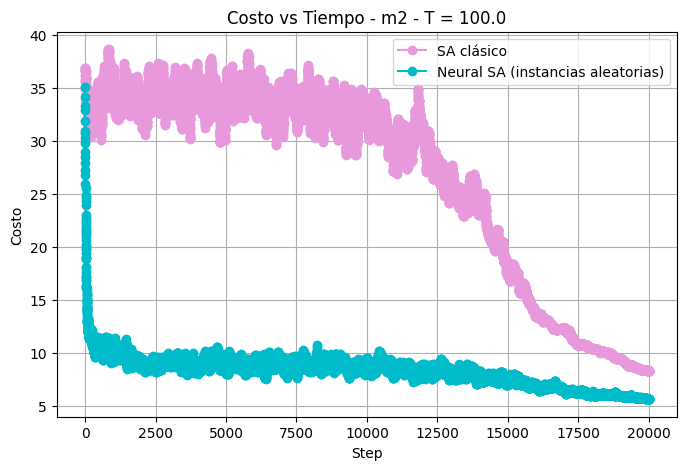

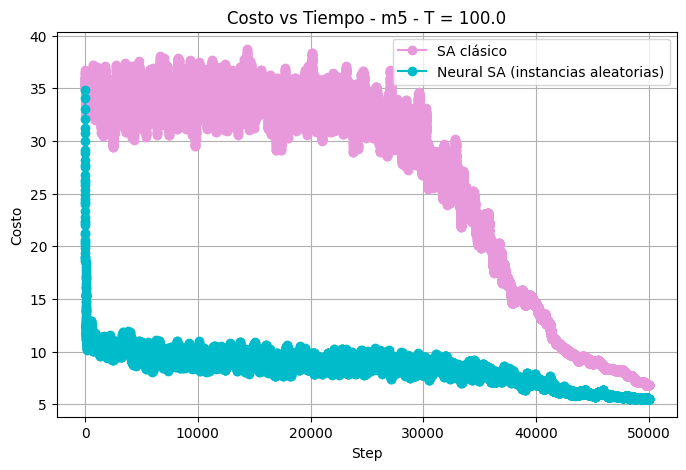

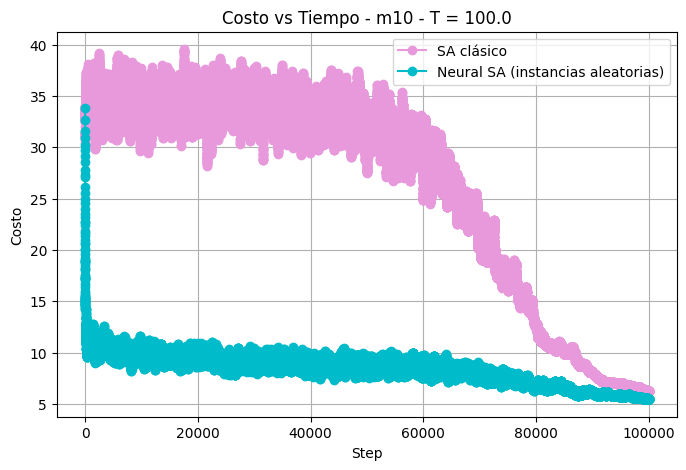

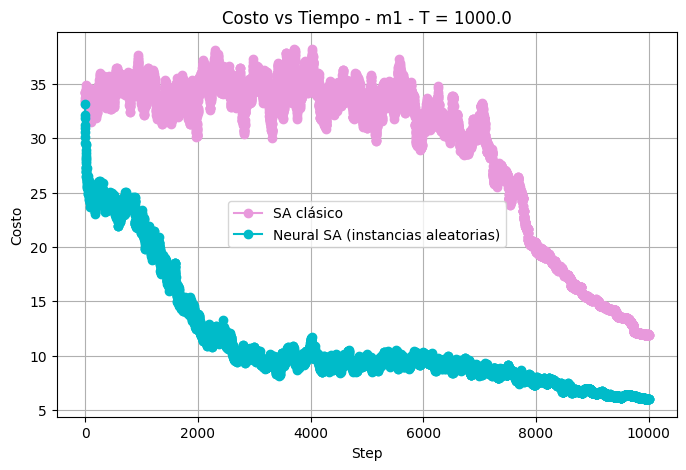

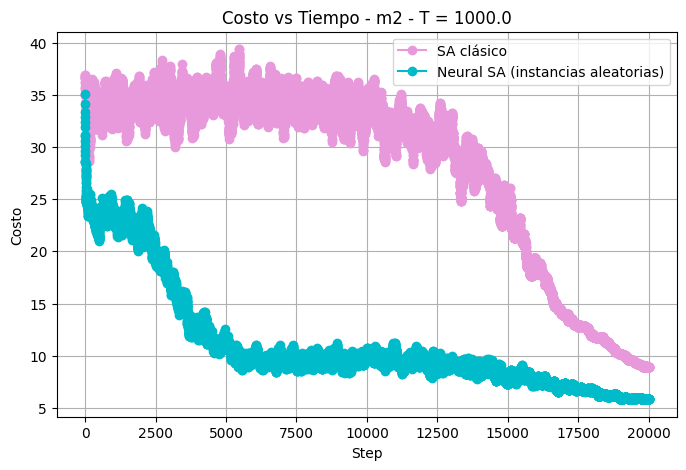

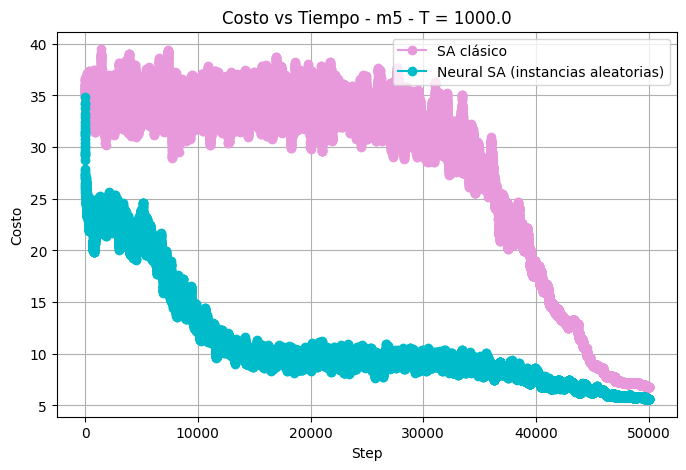

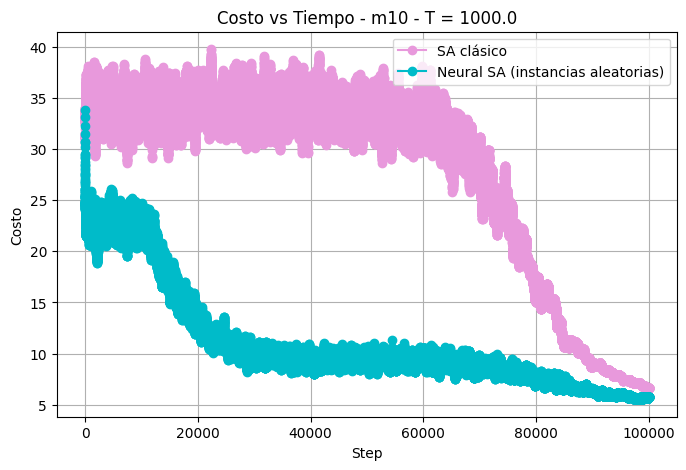

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

for t in [1.0, 10.0, 100.0, 1000.0]:
    for m in [1, 2, 5, 10]:
        # Graficar ambos en un mismo gráfico pero diferenciando por color
        df_random_out2 = pd.read_csv(f"outputs/results/tsp/random_out2_100-ppo_temp{t}_m{m}_i1.csv")
        df_neural_sa = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp{t}_m{m}_i1.csv")

        plt.figure(figsize=(8, 5))
        plt.plot(df_random_out2["step"], df_random_out2["cost"], marker='o', label='SA clásico', color='#e899dc')
        plt.plot(df_neural_sa["step"], df_neural_sa["cost"], marker='o', label='Neural SA (instancias aleatorias)', color='#00BBC9')
        plt.xlabel("Step")
        plt.ylabel("Costo")
        plt.title(f"Costo vs Tiempo - m{m} - T = {t}")
        plt.legend()
        plt.grid(True)
        plt.show()

## Graficar rutas

In [45]:
pacientes_df.head()

,ID,COORDENADAS,REQUERIMIENTO,MEDICAMENTO,EXAMEN,DURACIÓN,INICIO VENTANA,FIN VENTANA,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SÁBADO,DOMINGO,lat,lon,lat_normalizado,lon_normalizado
0,1,"(-33.4678909531286, -70.65463004918607)",Ambulatorio Baja Complejidad,Medicamento Perecible,Examen No Perecible,120,08:00,17:00,Si,No,No,No,No,Si,Si,-33.467891,-70.654630,0.534392,0.331137
1,2,"(-33.48658841671564, -70.75634685656043)",Alta Complejidad,Medicamento Perecible,No,60,14:00,19:00,Si,No,No,No,No,Si,No,-33.486588,-70.756347,0.475449,0.010475
2,3,"(-33.45573974255346, -70.53409723263033)",Mediana Complejidad,No,No,60,17:00,21:00,Si,Si,No,No,No,No,No,-33.455740,-70.534097,0.572699,0.711116
3,4,"(-33.43924647571843, -70.55086632414314)",Mediana Complejidad,No,Examen No Perecible,30,08:30,18:30,Si,No,No,Si,No,No,No,-33.439246,-70.550866,0.624694,0.658252
4,5,"(-33.4142687923318, -70.61093453175329)",Ambulatorio Mediana Complejidad,No,No,60,08:30,12:30,Si,Si,Si,No,Si,No,No,-33.414269,-70.610935,0.703436,0.468887


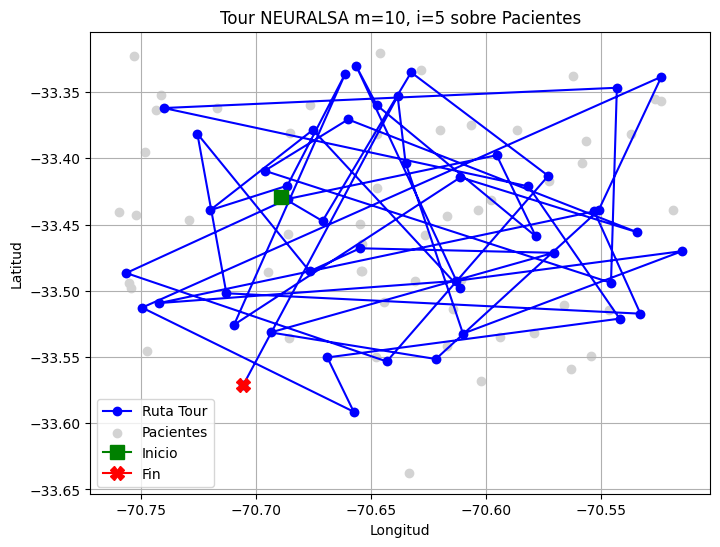

In [56]:
run_neuralsa_m10_i5 = [14, 20, 33, 25, 7, 1, 22, 39, 19, 45, 8, 24, 11, 26, 15, 36, 40, 4, 2, 6, 9, 44, 41, 23, 31, 30, 12, 42, 16, 37, 3, 13, 43, 21, 0, 38, 28, 17, 29, 35, 18, 10, 32, 34, 5, 27, 46]
import matplotlib.pyplot as plt

# Extraer lat/lon según el orden del tour
tour_indices = run_neuralsa_m10_i5
lats = pacientes_df.loc[tour_indices, 'lat']
lons = pacientes_df.loc[tour_indices, 'lon']

plt.figure(figsize=(8, 6))
plt.plot(lons, lats, marker='o', linestyle='-', color='blue', label='Ruta Tour')
plt.scatter(pacientes_df['lon'], pacientes_df['lat'], color='lightgray', label='Pacientes')

# Resaltar inicio y fin
plt.plot(lons.iloc[0], lats.iloc[0], marker='s', color='green', markersize=10, label='Inicio')
plt.plot(lons.iloc[-1], lats.iloc[-1], marker='X', color='red', markersize=10, label='Fin')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Tour NEURALSA m=10, i=5 sobre Pacientes')
plt.legend()
plt.grid(True)
plt.show()


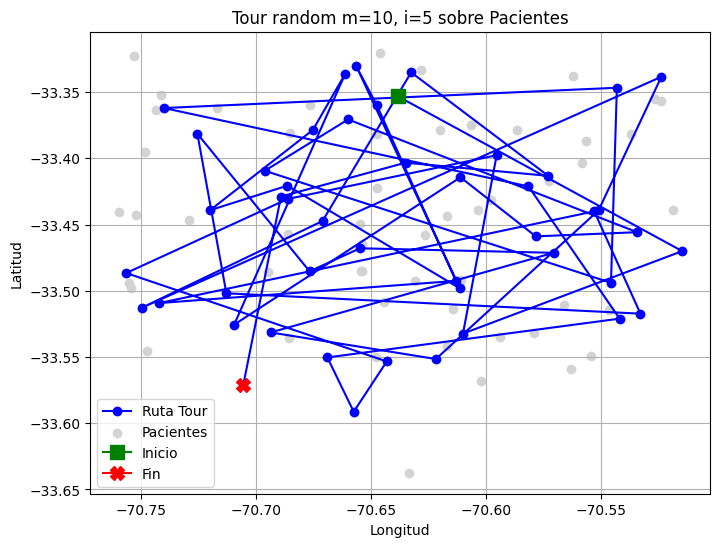

In [57]:
run_random_m10_i5 = [27, 32, 34, 39, 22, 1, 7, 42, 12, 30, 31, 23, 41, 44, 9, 6, 2, 19, 4, 40, 36, 11, 26, 15, 24, 8, 45, 10, 18, 35, 29, 17, 28, 38, 0, 21, 43, 13, 3, 37, 16, 20, 33, 25, 5, 14, 46]

# Extraer lat/lon según el orden del tour
tour_indices = run_random_m10_i5
lats = pacientes_df.loc[tour_indices, 'lat']
lons = pacientes_df.loc[tour_indices, 'lon']

plt.figure(figsize=(8, 6))
plt.plot(lons, lats, marker='o', linestyle='-', color='blue', label='Ruta Tour')
plt.scatter(pacientes_df['lon'], pacientes_df['lat'], color='lightgray', label='Pacientes')

# Resaltar inicio y fin
plt.plot(lons.iloc[0], lats.iloc[0], marker='s', color='green', markersize=10, label='Inicio')
plt.plot(lons.iloc[-1], lats.iloc[-1], marker='X', color='red', markersize=10, label='Fin')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Tour random m=10, i=5 sobre Pacientes')
plt.legend()
plt.grid(True)
plt.show()

## Dimensión = 100

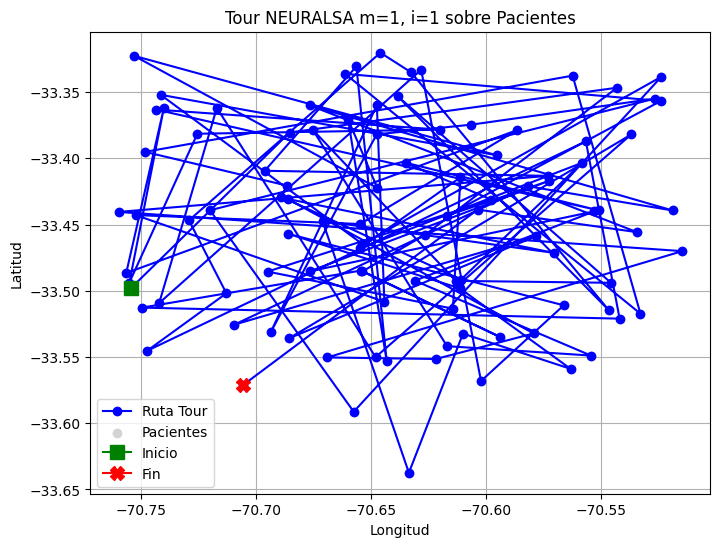

In [64]:
run_neuralsa_m10_i5 = [60, 58, 41, 65, 72, 78, 79, 16, 30, 62, 80, 17, 63, 57, 33, 83, 27, 44, 10, 11, 89, 97, 98, 35, 38, 82, 47, 74, 36, 29, 68, 87, 15, 14, 73, 51, 0, 4, 84, 66, 64, 5, 3, 52, 59, 28, 61, 23, 1, 55, 69, 91, 48, 45, 43, 94, 86, 81, 26, 42, 37, 85, 56, 39, 71, 70, 6, 7, 8, 9, 25, 50, 32, 12, 13, 92, 22, 21, 20, 99, 34, 93, 24, 49, 54, 90, 95, 18, 88, 77, 76, 75, 19, 40, 31, 96, 67, 2, 53, 46]
import matplotlib.pyplot as plt

# Extraer lat/lon según el orden del tour
tour_indices = run_neuralsa_m10_i5
lats = pacientes_df.loc[tour_indices, 'lat']
lons = pacientes_df.loc[tour_indices, 'lon']

plt.figure(figsize=(8, 6))
plt.plot(lons, lats, marker='o', linestyle='-', color='blue', label='Ruta Tour')
plt.scatter(pacientes_df['lon'], pacientes_df['lat'], color='lightgray', label='Pacientes')

# Resaltar inicio y fin
plt.plot(lons.iloc[0], lats.iloc[0], marker='s', color='green', markersize=10, label='Inicio')
plt.plot(lons.iloc[-1], lats.iloc[-1], marker='X', color='red', markersize=10, label='Fin')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Tour NEURALSA m=1, i=1 sobre Pacientes')
plt.legend()
plt.grid(True)
plt.show()

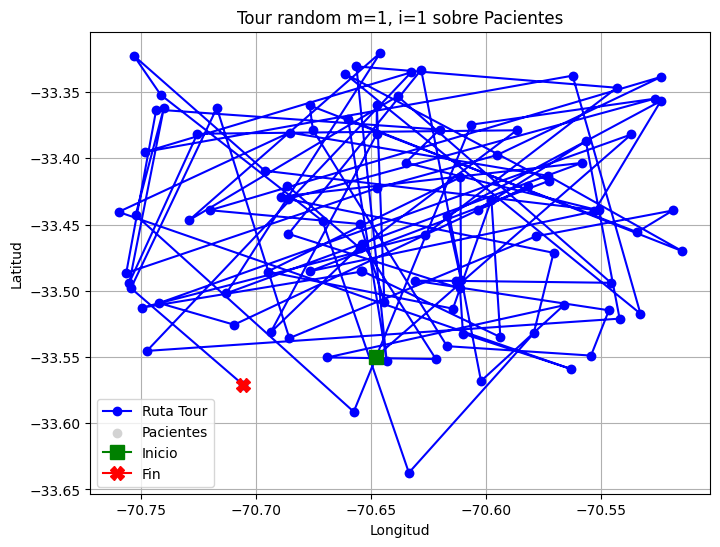

In [65]:
run_random_m10_i5 = [77, 76, 18, 40, 31, 53, 62, 30, 80, 33, 87, 68, 29, 36, 82, 38, 35, 74, 47, 73, 4, 66, 84, 64, 78, 79, 72, 16, 65, 41, 8, 7, 6, 32, 25, 58, 50, 93, 34, 24, 49, 95, 90, 54, 12, 13, 85, 43, 94, 45, 48, 69, 26, 37, 39, 70, 1, 52, 59, 5, 3, 9, 71, 56, 20, 99, 92, 21, 22, 81, 86, 42, 91, 23, 61, 28, 55, 0, 15, 14, 51, 17, 57, 63, 27, 44, 10, 98, 83, 97, 89, 11, 67, 2, 96, 19, 75, 88, 60, 46]

# Extraer lat/lon según el orden del tour
tour_indices = run_random_m10_i5
lats = pacientes_df.loc[tour_indices, 'lat']
lons = pacientes_df.loc[tour_indices, 'lon']

plt.figure(figsize=(8, 6))
plt.plot(lons, lats, marker='o', linestyle='-', color='blue', label='Ruta Tour')
plt.scatter(pacientes_df['lon'], pacientes_df['lat'], color='lightgray', label='Pacientes')

# Resaltar inicio y fin
plt.plot(lons.iloc[0], lats.iloc[0], marker='s', color='green', markersize=10, label='Inicio')
plt.plot(lons.iloc[-1], lats.iloc[-1], marker='X', color='red', markersize=10, label='Fin')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Tour random m=1, i=1 sobre Pacientes')
plt.legend()
plt.grid(True)
plt.show()

## Lectura excel Huge (para entrenamiento n = 40)

In [71]:
huge_df = pd.read_excel("pacientes_huge.xlsx", sheet_name="s1")
huge_df.head(5)

,ID,COORDENADAS,REQUERIMIENTO,MEDICAMENTO,EXAMEN,DURACIÓN,INICIO VENTANA,FIN VENTANA,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SÁBADO,DOMINGO
0,1,"(-33.37502382785055, -70.68692858993452)",Alta Complejidad,No,No,30,14:30,21:30,Si,No,Si,Si,Si,No,No
1,2,"(-33.50275072929396, -70.71532429360117)",Ambulatorio Baja Complejidad,No,Examen Perecible,30,08:00:00,16:00,Si,Si,Si,Si,No,No,Si
2,3,"(-33.51432948436293, -70.64122153416812)",Alta Complejidad,No,No,120,10:00,23:00,No,Si,Si,Si,No,Si,Si
3,4,"(-33.49807868992778, -70.63589011421942)",Mediana Complejidad,No,No,30,19:00,22:00,Si,Si,No,No,Si,Si,No
4,5,"(-33.50448330520766, -70.68350360700668)",Ambulatorio Baja Complejidad,No,No,30,08:30,17:30,No,No,No,Si,Si,No,No


In [72]:
coords_split = huge_df["COORDENADAS"].str.strip("()").str.split(",", expand=True)
huge_df["lat"] = coords_split[0].astype(float)
huge_df["lon"] = coords_split[1].astype(float)
print(huge_df["lat"])

0     -33.375024
1     -33.502751
2     -33.514329
3     -33.498079
4     -33.504483
         ...    
995   -33.316119
996   -33.648777
997   -33.616378
998   -33.429702
999   -33.427639
Name: lat, Length: 1000, dtype: float64


**Normalización**

In [73]:
mininmo_lat = huge_df["lat"].min()
maximo_lat = huge_df["lat"].max()
mininmo_lon = huge_df["lon"].min()
maximo_lon = huge_df["lon"].max()
factor = max(maximo_lat - mininmo_lat, maximo_lon - mininmo_lon)
huge_df["lat_normalizado"] = (huge_df["lat"] - mininmo_lat) / factor
huge_df["lon_normalizado"] = (huge_df["lon"] - mininmo_lon) / factor
print(huge_df["lat_normalizado"])

0      0.840252
1      0.493863
2      0.462462
3      0.506533
4      0.489164
         ...   
995    1.000000
996    0.097847
997    0.185710
998    0.691968
999    0.697563
Name: lat_normalizado, Length: 1000, dtype: float64


In [74]:
# Crear una lista de tuplas donde cada tupla es (lat_normalizado, lon_normalizado)
coordenadas_tuplas = list(zip(huge_df["lat_normalizado"], huge_df["lon_normalizado"]))
print(coordenadas_tuplas)
print(len(coordenadas_tuplas))

[(0.84025228463543, 0.26733085408564405), (0.49386269192570015, 0.1903229871708286), (0.4624616306997312, 0.39128632667572144), (0.5065330518489851, 0.4057448969825733), (0.4891640242346896, 0.2766192532247848), (0.7741422158281162, 0.36519894282367255), (0.561195271177536, 0.5269519409464063), (0.9438638715570039, 0.508969239871095), (0.5271922713170712, 0.31991998126733384), (0.8063318415079399, 0.6579039924977516), (0.5463280770087712, 0.11480531468951684), (0.6373144014558247, 0.24099248788288158), (0.5841473560469175, 0.3136124956739134), (0.5421210230147917, 0.4840338844063613), (0.6632939012636634, 0.5034905739248727), (0.45407657419418895, 0.6364921385908971), (0.7240804112321122, 0.6166871522226313), (0.6031154454336566, 0.4894387329803931), (0.37218788465558694, 0.6276458507632414), (0.9293998395057977, 0.22452854670701086), (0.5143022821374185, 0.4993417929023939), (0.42309520600369155, 0.12860364515325576), (0.3090364632920793, 0.4153568154217388), (0.5556242394274636, 0.60

In [75]:
dic_huge = {}
for index, row in huge_df.iterrows():
    dic_huge[index + 1] = (row["lat_normalizado"], row["lon_normalizado"])
print(dic_huge)

{1: (0.84025228463543, 0.26733085408564405), 2: (0.49386269192570015, 0.1903229871708286), 3: (0.4624616306997312, 0.39128632667572144), 4: (0.5065330518489851, 0.4057448969825733), 5: (0.4891640242346896, 0.2766192532247848), 6: (0.7741422158281162, 0.36519894282367255), 7: (0.561195271177536, 0.5269519409464063), 8: (0.9438638715570039, 0.508969239871095), 9: (0.5271922713170712, 0.31991998126733384), 10: (0.8063318415079399, 0.6579039924977516), 11: (0.5463280770087712, 0.11480531468951684), 12: (0.6373144014558247, 0.24099248788288158), 13: (0.5841473560469175, 0.3136124956739134), 14: (0.5421210230147917, 0.4840338844063613), 15: (0.6632939012636634, 0.5034905739248727), 16: (0.45407657419418895, 0.6364921385908971), 17: (0.7240804112321122, 0.6166871522226313), 18: (0.6031154454336566, 0.4894387329803931), 19: (0.37218788465558694, 0.6276458507632414), 20: (0.9293998395057977, 0.22452854670701086), 21: (0.5143022821374185, 0.4993417929023939), 22: (0.42309520600369155, 0.12860364

Guardamos en un archivo csv en la carpeta `training_datasets`

In [76]:
with open('training_datasets/grafo_huge.csv', mode='w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['NODE', 'X', 'Y'])
    for node, (x, y) in dic_huge.items():
        writer.writerow([node, x, y])

## Crear instancias para evaluar (huge)  
Se va a tomar las columnas de cada día tomando el si/no. Se van a guardar en la carpeta `datasets` bajo los nombres `grafo_huge_s1_<dia>`

In [ ]:
from traceback import print_tb

pacientes_df = pd.read_excel("pacientes_huge.xlsx", sheet_name=f"s1")
# Separar coordenadas
coords_split = pacientes_df["COORDENADAS"].str.strip("()").str.split(",", expand=True)
pacientes_df["lat"] = coords_split[0].astype(float)
pacientes_df["lon"] = coords_split[1].astype(float)
# Normalizar coords
mininmo_lat = pacientes_df["lat"].min()
maximo_lat = pacientes_df["lat"].max()
mininmo_lon = pacientes_df["lon"].min()
maximo_lon = pacientes_df["lon"].max()
factor = max(maximo_lat - mininmo_lat, maximo_lon - mininmo_lon)
pacientes_df["lat_normalizado"] = (pacientes_df["lat"] - mininmo_lat) / factor
pacientes_df["lon_normalizado"] = (pacientes_df["lon"] - mininmo_lon) / factor

# Crear diccionario de coordenadas
dic = {}
for index, row in pacientes_df.iterrows():
    dic[index + 1] = (row["lat_normalizado"], row["lon_normalizado"])

    # Por cada día de la semana, crear diccionario de nodos a visitar en ese día
    dias_semana = ["LUNES", "MARTES", "MIERCOLES", "JUEVES", "VIERNES", "SÁBADO", "DOMINGO"]
    nodos_por_dia = {}

for dia in dias_semana:
    # Nos aseguramos que el nombre de la columna exista (por si falta en algunas sheets)
    if dia in pacientes_df.columns:
        # index+1 para mantener la numeración de nodos
        nodos = [index + 1 for index, row in pacientes_df.iterrows() if str(row[dia]).strip().upper() == "SI"]
        # Guardar el diccionario de las coords (normalizadas) de los pacientes de ese día
        coords_dic = {node: dic[node] for node in nodos}
        nodos_por_dia[dia] = coords_dic
    # Ahora nodos_por_dia[DIA] te da el diccionario de nodos/coordenadas a visitar ese día

# Guardar archivos para cada día en la carpeta dataset
output_dir = "datasets"
os.makedirs(output_dir, exist_ok=True)

for dia, coords_dic in nodos_por_dia.items():
    # Construimos el nombre del archivo como se indicó: grafo_s{i}_dia, todo minúscula
    filename = f"grafo_huge_s1_{dia.lower()}"
    filepath = os.path.join(output_dir, filename)
    # Escribimos el csv
    with open(filepath, mode='w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['NODE', 'X', 'Y'])
        for node, (x, y) in coords_dic.items():
            writer.writerow([node, x, y])

In [78]:
import numpy as np
import csv
import os

In [81]:
pacientes_df = pd.read_excel("pacientes_huge.xlsx", sheet_name=f"s1")

# Separar coordenadas
coords_split = pacientes_df["COORDENADAS"].str.strip("()").str.split(",", expand=True)
pacientes_df["lat"] = coords_split[0].astype(float)
pacientes_df["lon"] = coords_split[1].astype(float)

# Normalizar coords
mininmo_lat = pacientes_df["lat"].min()
maximo_lat = pacientes_df["lat"].max()
mininmo_lon = pacientes_df["lon"].min()
maximo_lon = pacientes_df["lon"].max()
factor = max(maximo_lat - mininmo_lat, maximo_lon - mininmo_lon)
pacientes_df["lat_normalizado"] = (pacientes_df["lat"] - mininmo_lat) / factor
pacientes_df["lon_normalizado"] = (pacientes_df["lon"] - mininmo_lon) / factor

# Seleccionar 300 nodos aleatorios
n_nodes = 100
np.random.seed(42)
selected_indices = np.random.choice(len(pacientes_df), size=min(n_nodes, len(pacientes_df)), replace=False)
selected_df = pacientes_df.iloc[selected_indices]

# Guardar en archivo CSV
output_dir = "datasets"
os.makedirs(output_dir, exist_ok=True)

filename = "grafo_random_100.csv"
filepath = os.path.join(output_dir, filename)

with open(filepath, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['NODE', 'X', 'Y'])
    for idx, (original_idx, row) in enumerate(selected_df.iterrows()):
        writer.writerow([idx + 1, row["lat_normalizado"], row["lon_normalizado"]])

print(f"Archivo creado: {filepath}")
print(f"Total de nodos: {len(selected_df)}")

Archivo creado: datasets/grafo_random_100.csv
Total de nodos: 100


## **Resultados Huge**

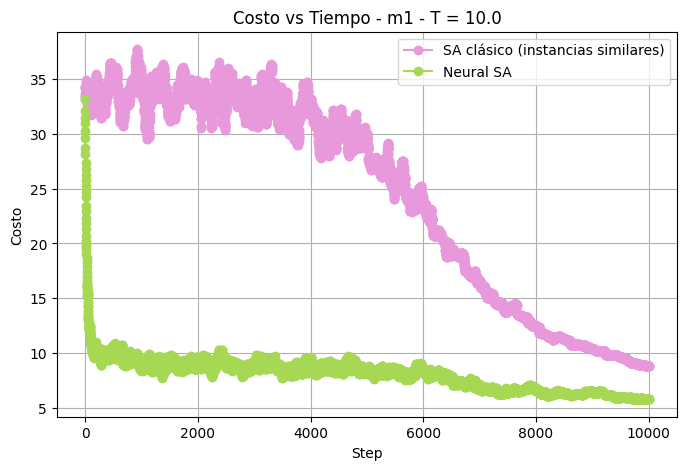

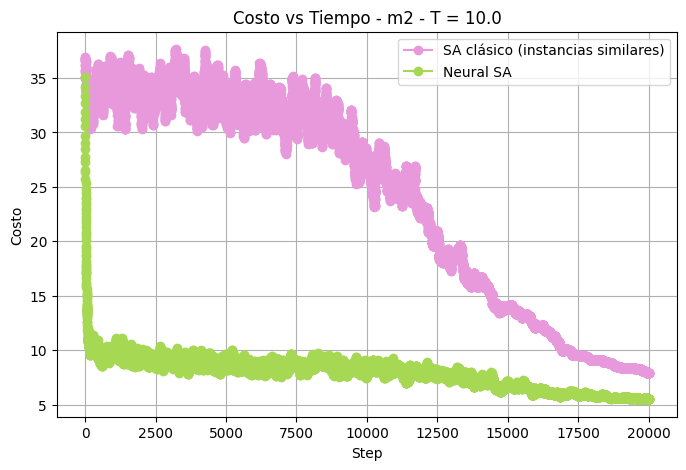

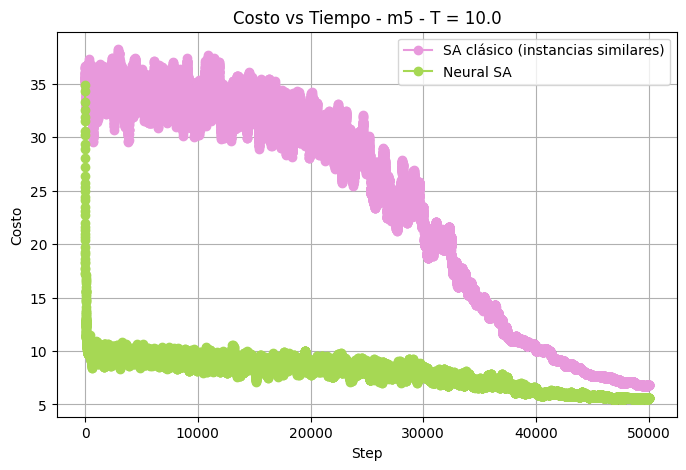

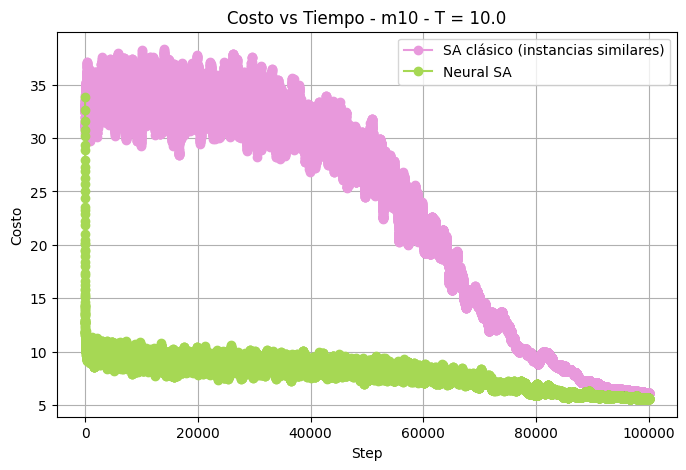

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

for m in [1, 2, 5, 10]:
    # Graficar ambos en un mismo gráfico pero diferenciando por color
    df_random_out2 = pd.read_csv(f"outputs/results/tsp/random_out2_100-ppo_temp10.0_m{m}_i1.csv")
    df_neural_sa = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp10.0_m{m}_i1.csv")

    plt.figure(figsize=(8, 5))
    plt.plot(df_random_out2["step"], df_random_out2["cost"], marker='o', label='SA clásico (instancias similares)', color='#e899dc')
    plt.plot(df_neural_sa["step"], df_neural_sa["cost"], marker='o', label='Neural SA', color='#a6d854')
    plt.xlabel("Step")
    plt.ylabel("Costo")
    plt.title(f"Costo vs Tiempo - m{m} - T = 10.0")
    plt.legend()
    plt.grid(True)
    plt.show()

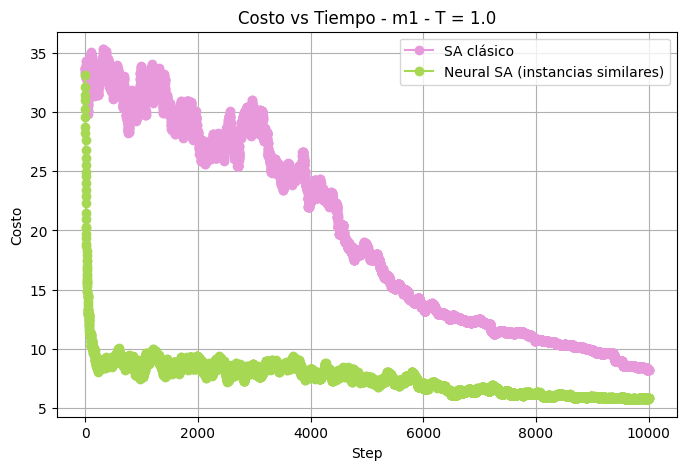

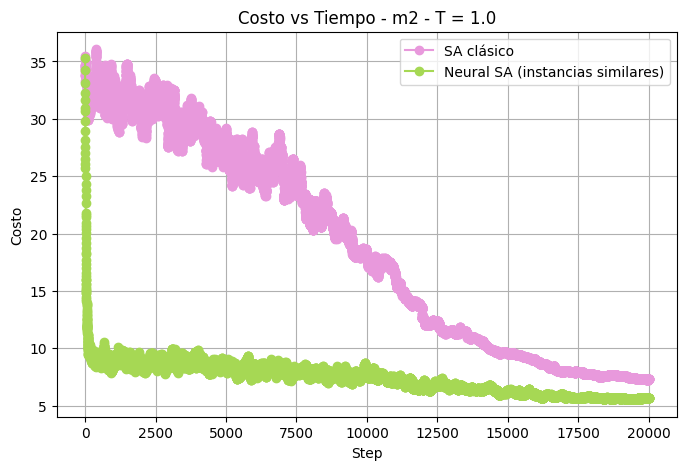

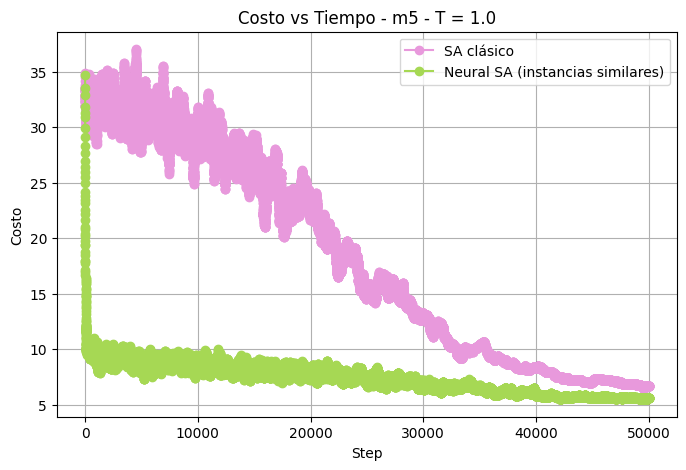

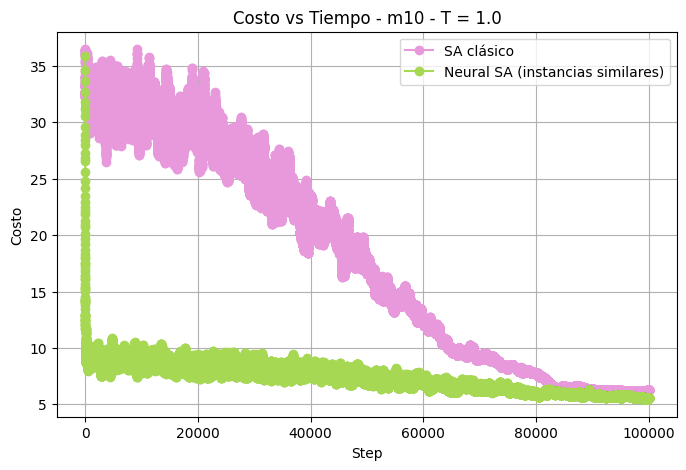

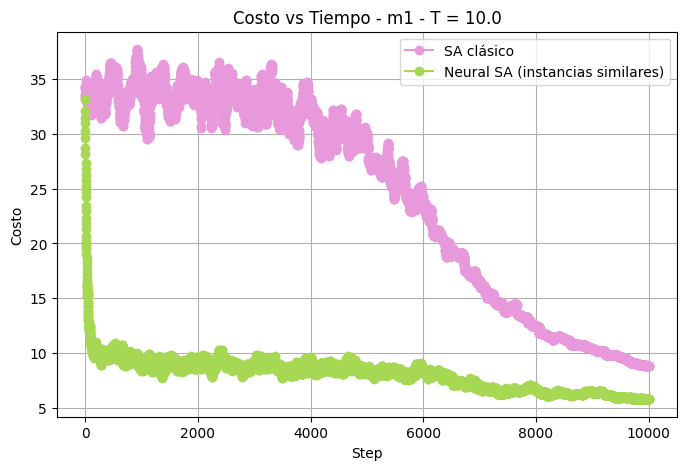

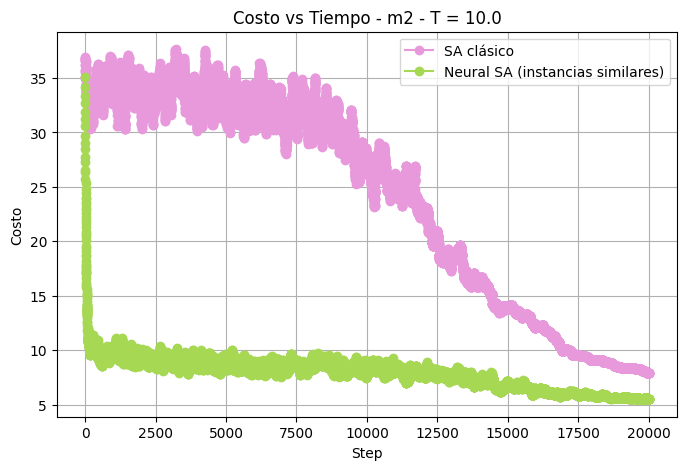

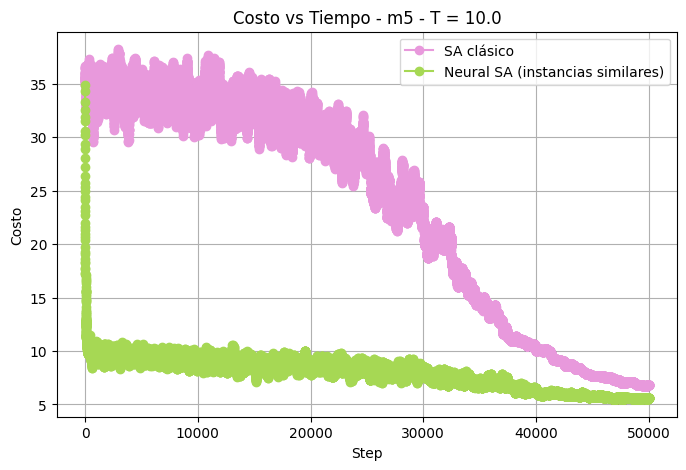

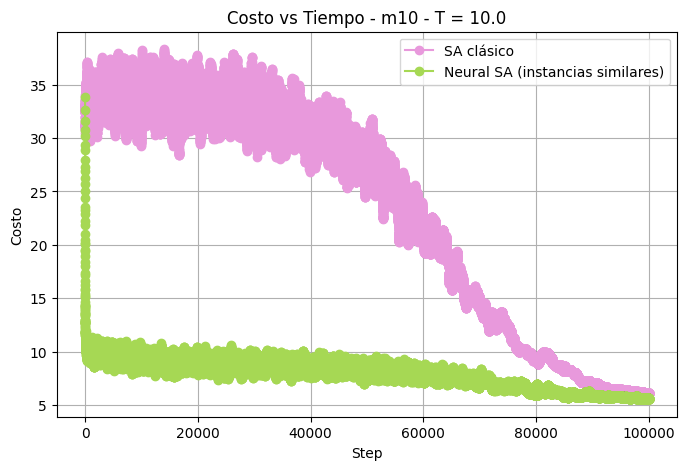

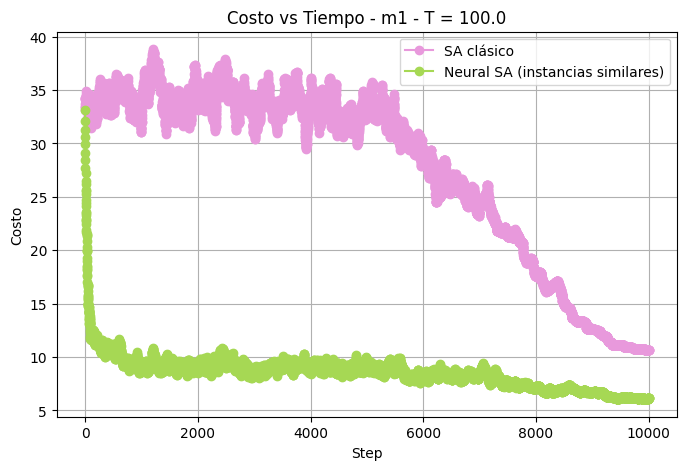

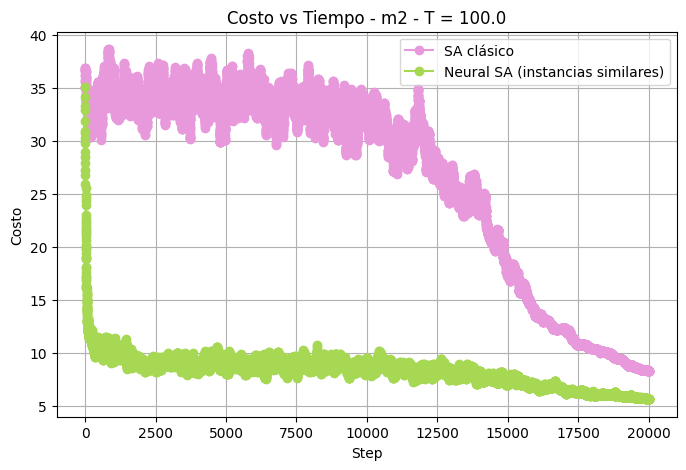

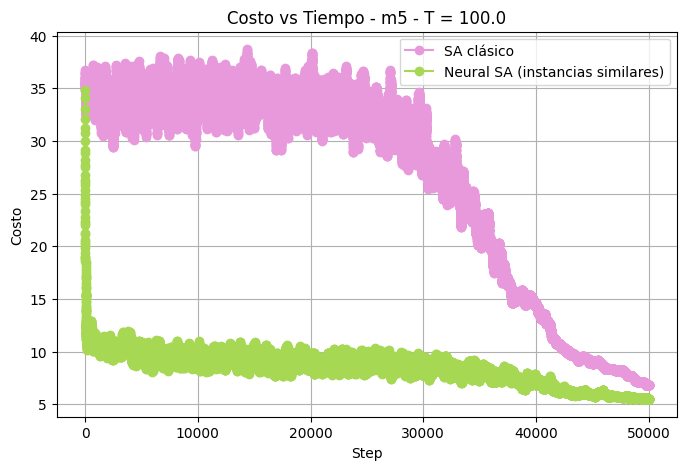

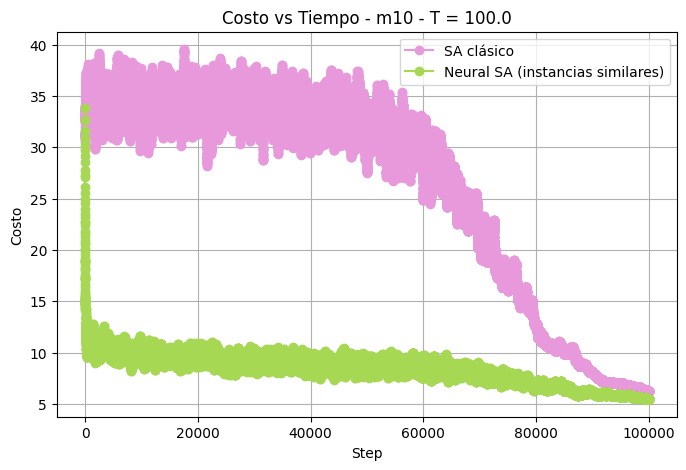

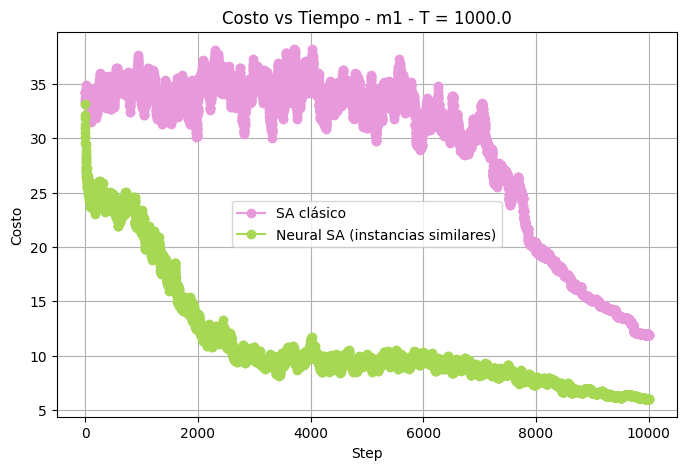

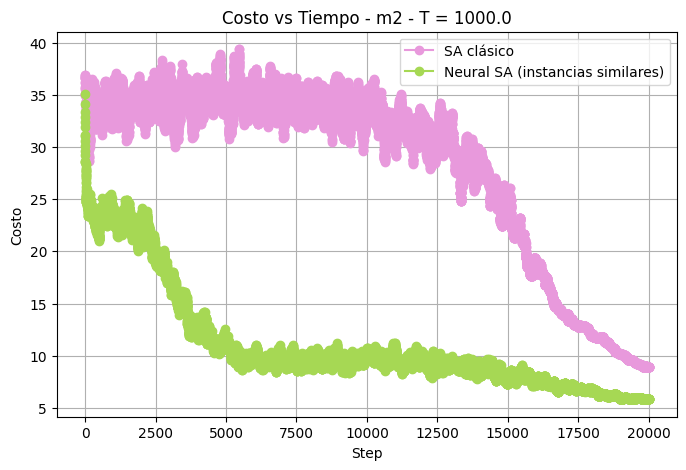

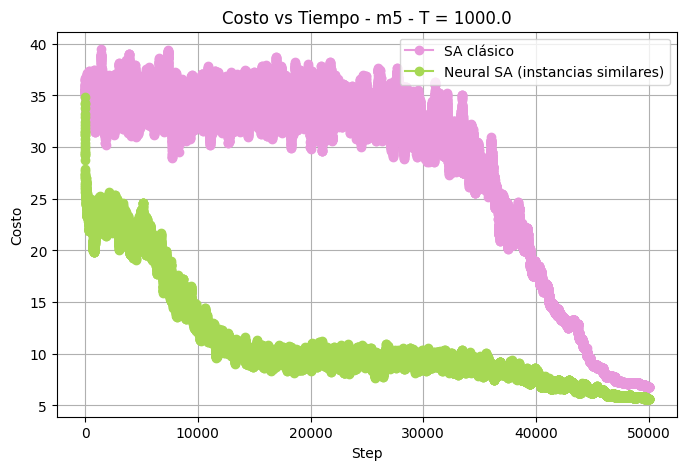

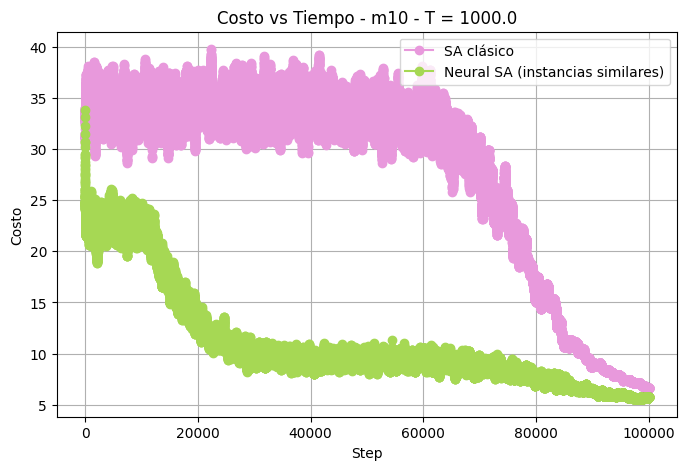

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

for t in [1.0, 10.0, 100.0, 1000.0]:
    for m in [1, 2, 5, 10]:
        # Graficar ambos en un mismo gráfico pero diferenciando por color
        df_random_out2 = pd.read_csv(f"outputs/results/tsp/random_out2_100-ppo_temp{t}_m{m}_i1.csv")
        df_neural_sa_aleatorio = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp{t}_m{m}_i1.csv")

        plt.figure(figsize=(8, 5))
        plt.plot(df_random_out2["step"], df_random_out2["cost"], marker='o', label='SA clásico', color='#e899dc')
        plt.plot(df_neural_sa["step"], df_neural_sa["cost"], marker='o', label='Neural SA (instancias similares)', color='#a6d854')
        plt.xlabel("Step")
        plt.ylabel("Costo")
        plt.title(f"Costo vs Tiempo - m{m} - T = {t}")
        plt.legend()
        plt.grid(True)
        plt.show()

## Graficar ambos

para m =1

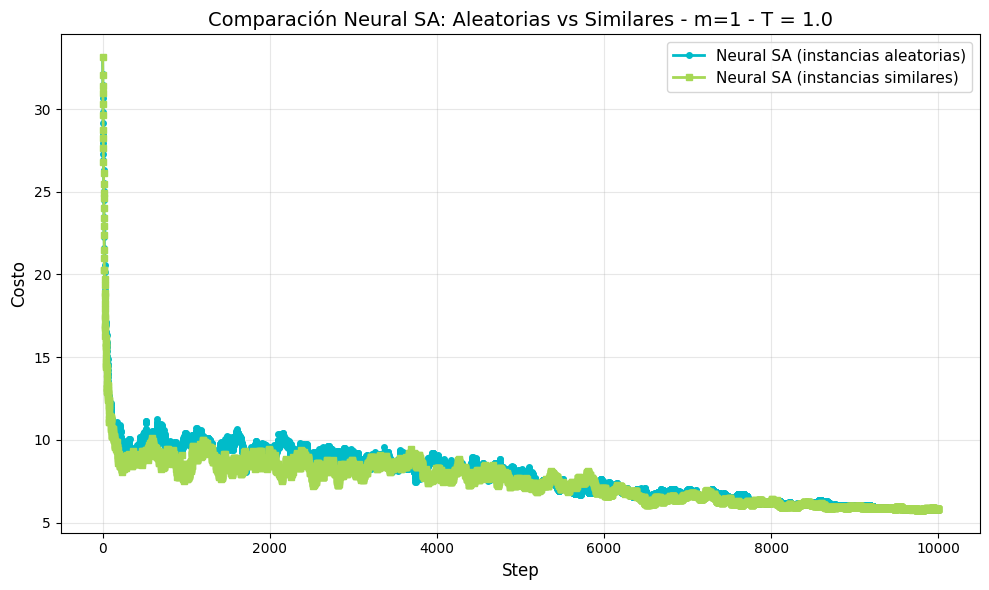

In [101]:
for t in [1.0]:
    df_neural_sa = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp{t}_m1_i1.csv")
    plt.figure(figsize=(10, 6))
    plt.plot(df_neural_sa_aleatorio_m1["step"], df_neural_sa_aleatorio_m1["cost"], marker='o', label='Neural SA (instancias aleatorias)', color='#00BBC9', linewidth=2, markersize=4)
    plt.plot(df_neural_sa["step"], df_neural_sa["cost"], marker='s', label='Neural SA (instancias similares)', color='#a6d854', linewidth=2, markersize=4)
    plt.xlabel("Step", fontsize=12)
    plt.ylabel("Costo", fontsize=12)
    plt.title(f"Comparación Neural SA: Aleatorias vs Similares - m=1 - T = {t}", fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

m = 2

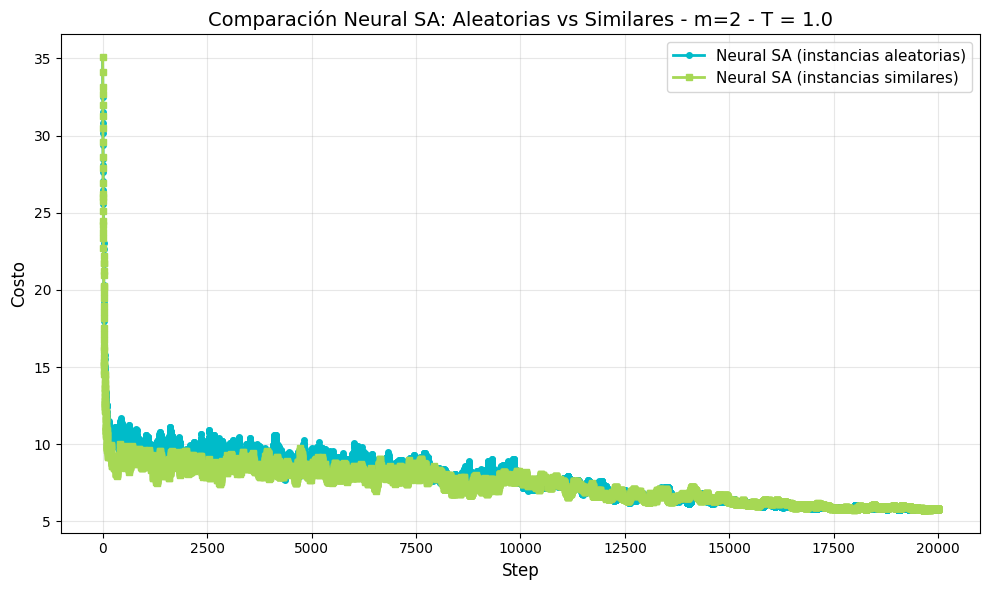

In [102]:
for t in [1.0]:
    df_neural_sa = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp{t}_m2_i1.csv")
    plt.figure(figsize=(10, 6))
    plt.plot(df_neural_sa_aleatorio_m2["step"], df_neural_sa_aleatorio_m2["cost"], marker='o', label='Neural SA (instancias aleatorias)', color='#00BBC9', linewidth=2, markersize=4)
    plt.plot(df_neural_sa["step"], df_neural_sa["cost"], marker='s', label='Neural SA (instancias similares)', color='#a6d854', linewidth=2, markersize=4)
    plt.xlabel("Step", fontsize=12)
    plt.ylabel("Costo", fontsize=12)
    plt.title(f"Comparación Neural SA: Aleatorias vs Similares - m=2 - T = {t}", fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

m= 5

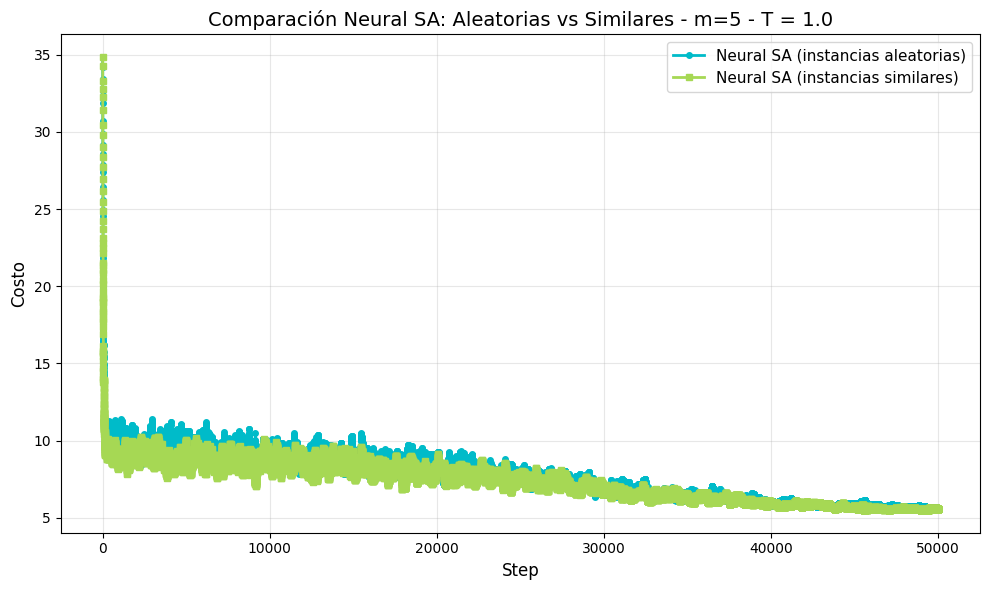

In [103]:
for t in [1.0]:
    df_neural_sa = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp{t}_m5_i1.csv")
    plt.figure(figsize=(10, 6))
    plt.plot(df_neural_sa_aleatorio_m5["step"], df_neural_sa_aleatorio_m5["cost"], marker='o', label='Neural SA (instancias aleatorias)', color='#00BBC9', linewidth=2, markersize=4)
    plt.plot(df_neural_sa["step"], df_neural_sa["cost"], marker='s', label='Neural SA (instancias similares)', color='#a6d854', linewidth=2, markersize=4)
    plt.xlabel("Step", fontsize=12)
    plt.ylabel("Costo", fontsize=12)
    plt.title(f"Comparación Neural SA: Aleatorias vs Similares - m=5 - T = {t}", fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

m = 10

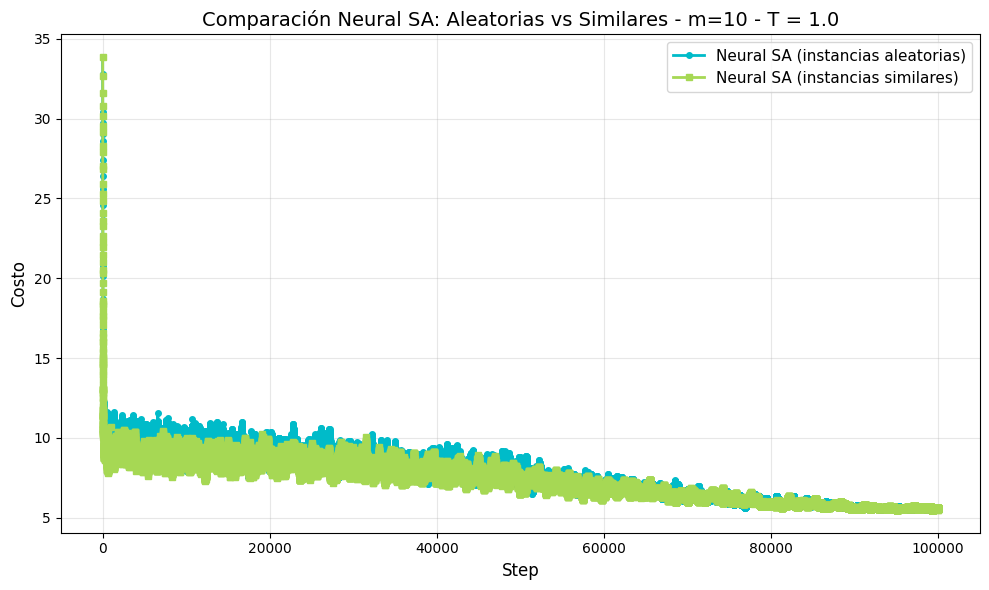

In [104]:
for t in [1.0]:
    df_neural_sa = pd.read_csv(f"outputs/results/tsp/train_out_sampled2_100-ppo_temp{t}_m10_i1.csv")
    plt.figure(figsize=(10, 6))
    plt.plot(df_neural_sa_aleatorio_m10["step"], df_neural_sa_aleatorio_m10["cost"], marker='o', label='Neural SA (instancias aleatorias)', color='#00BBC9', linewidth=2, markersize=4)
    plt.plot(df_neural_sa["step"], df_neural_sa["cost"], marker='s', label='Neural SA (instancias similares)', color='#a6d854', linewidth=2, markersize=4)
    plt.xlabel("Step", fontsize=12)
    plt.ylabel("Costo", fontsize=12)
    plt.title(f"Comparación Neural SA: Aleatorias vs Similares - m=10 - T = {t}", fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()